In [2]:
import numpy as np
import matplotlib.pyplot as plt

###### Реализуем сначала функцию , вычислюющую центры кластеризаии
Инициализация происходит случайным выбором k точек.

In [10]:
def InitializeCentres(points, k):
    centres = points.copy()
    np.random.shuffle(centres)
    return centres[:k]

###### Теперь реализуем функцию , вычисляющую ближайший центроид для точек
В качестве метрики используется Евклидово расстояние.
Нумерация центров  ведется с нуля.

In [4]:
def ClosestCenter(points, centroids):
    dist = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(dist, axis=0)

###### Затем нужно реализовать "перемещение" центров

In [5]:
def MoveCenter(points, closest, centres):
    return np.array([points[closest==k].mean(axis=0) for k in range(centres.shape[0])])

###### Алгоритм готов. Для применения к конкретной задаче достаточно использовать реализованные функции


In [6]:
def GetClusters(points, number, iterations) :
    centers = InitializeCentres(points,number)
    for i in range(iterations):
        closest = ClosestCenter(points, centers)
        centers= MoveCenter(points,closest,centers)
    return centers
        

In [7]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

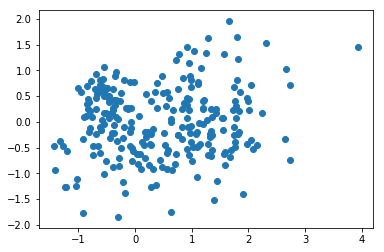

In [8]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()

In [40]:
clusters = GetClusters(points, 5 , 10)

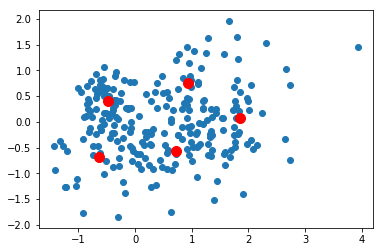

In [41]:
plt.cla()
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(clusters[:, 0], clusters[:, 1], c='r', s=100)